In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
df0 = pd.read_csv('Crude Oil Prices.csv', index_col='Date', parse_dates=True)

In [4]:
df = df0[['Close/Last']].copy()

In [5]:
df.reset_index(level=0, inplace=True)
df=df.sort_values(by='Date')
df=df.set_index('Date')

In [6]:
df.head()

,Close/Last
Date,
2011-08-08,81.31
2011-08-09,79.30
2011-08-10,82.89
2011-08-11,85.72
2011-08-12,85.38


In [7]:
df['LogClose/Last'] = np.log(df['Close/Last'])

c:\users\hp envy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
df['DiffLogClose/Last'] = df['LogClose/Last'].diff()

In [9]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [10]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose/Last']])
test_scaled = scaler.transform(test[['DiffLogClose/Last']])

In [11]:
len(train_scaled)

2194

In [12]:
type(test_scaled)

numpy.ndarray

In [13]:
df.shape

(2559, 3)

In [14]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last
Date,,,
2011-08-08,81.31,4.398269,NaN
2011-08-09,79.30,4.373238,-0.025031
2011-08-10,82.89,4.417514,0.044276
2011-08-11,85.72,4.451086,0.033572
2011-08-12,85.38,4.447112,-0.003974


In [15]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [16]:
train.shape

(2194, 3)

In [17]:
train.index[-1]

Timestamp('2020-02-26 00:00:00')

In [18]:
t = np.concatenate((train_scaled, test_scaled))

In [19]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [20]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn
Date,,,,
2011-08-08,81.31,4.398269,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010
2011-08-10,82.89,4.417514,0.044276,2.137786
2011-08-11,85.72,4.451086,0.033572,1.623651
2011-08-12,85.38,4.447112,-0.003974,-0.179671


In [21]:
df1 = df.dropna()

In [22]:
df1.shape

(2556, 4)

In [24]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 273
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2283, 273) Y.shape (2283,)


In [25]:
Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]

In [26]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [27]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [28]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)

Epoch 1/600
60/60 [==============================] - 21s 119ms/step - loss: 6.2406 - val_loss: 0.7874
Epoch 2/600
60/60 [==============================] - 0s 6ms/step - loss: 2.7477 - val_loss: 0.6687
Epoch 3/600
60/60 [==============================] - 0s 6ms/step - loss: 1.8523 - val_loss: 0.6359
Epoch 4/600
60/60 [==============================] - 7s 112ms/step - loss: 1.6312 - val_loss: 0.6179
Epoch 5/600
60/60 [==============================] - 0s 6ms/step - loss: 1.3724 - val_loss: 0.6227
Epoch 6/600
60/60 [==============================] - 6s 106ms/step - loss: 1.2547 - val_loss: 0.6358
Epoch 7/600
60/60 [==============================] - 0s 6ms/step - loss: 1.1500 - val_loss: 0.6433
Epoch 8/600
60/60 [==============================] - 0s 5ms/step - loss: 0.8566 - val_loss: 0.6568
Epoch 9/600
60/60 [==============================] - 0s 5ms/step - loss: 0.9013 - val_loss: 0.6734
Epoch 10/600
60/60 [==============================] - 6s 106ms/step - loss: 0.6512 - val_loss: 0.6806


Epoch 82/600
60/60 [==============================] - 1s 11ms/step - loss: 0.0702 - val_loss: 0.7783
Epoch 83/600
60/60 [==============================] - 8s 133ms/step - loss: 0.0765 - val_loss: 0.7712
Epoch 84/600
60/60 [==============================] - 1s 9ms/step - loss: 0.1106 - val_loss: 0.7585
Epoch 85/600
60/60 [==============================] - 7s 122ms/step - loss: 0.1014 - val_loss: 0.7677
Epoch 86/600
60/60 [==============================] - 14s 243ms/step - loss: 0.1119 - val_loss: 0.7599
Epoch 87/600
60/60 [==============================] - 1s 11ms/step - loss: 0.1005 - val_loss: 0.7632
Epoch 88/600
60/60 [==============================] - 8s 129ms/step - loss: 0.0799 - val_loss: 0.7636
Epoch 89/600
60/60 [==============================] - 7s 123ms/step - loss: 0.0770 - val_loss: 0.7591
Epoch 90/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0865 - val_loss: 0.7555
Epoch 91/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0961 - val_

60/60 [==============================] - 0s 7ms/step - loss: 0.0806 - val_loss: 0.7302
Epoch 163/600
60/60 [==============================] - 7s 111ms/step - loss: 0.0708 - val_loss: 0.7184
Epoch 164/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0650 - val_loss: 0.7141
Epoch 165/600
60/60 [==============================] - 7s 116ms/step - loss: 0.0682 - val_loss: 0.7168
Epoch 166/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.7257
Epoch 167/600
60/60 [==============================] - 7s 110ms/step - loss: 0.0383 - val_loss: 0.7191
Epoch 168/600
60/60 [==============================] - 0s 7ms/step - loss: 0.0407 - val_loss: 0.7335
Epoch 169/600
60/60 [==============================] - 6s 106ms/step - loss: 0.0414 - val_loss: 0.7104
Epoch 170/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0471 - val_loss: 0.7347
Epoch 171/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0593 - val_loss: 0.7

60/60 [==============================] - 0s 5ms/step - loss: 0.0559 - val_loss: 0.7024
Epoch 243/600
60/60 [==============================] - 6s 105ms/step - loss: 0.0433 - val_loss: 0.7163
Epoch 244/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0521 - val_loss: 0.7022
Epoch 245/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.7125
Epoch 246/600
60/60 [==============================] - 6s 103ms/step - loss: 0.0387 - val_loss: 0.7123
Epoch 247/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.7071
Epoch 248/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0356 - val_loss: 0.7085
Epoch 249/600
60/60 [==============================] - 6s 103ms/step - loss: 0.0360 - val_loss: 0.7176
Epoch 250/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.7065
Epoch 251/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0380 - val_loss: 0.713

60/60 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.7036
Epoch 323/600
60/60 [==============================] - 6s 104ms/step - loss: 0.0489 - val_loss: 0.7037
Epoch 324/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.7104
Epoch 325/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0398 - val_loss: 0.7040
Epoch 326/600
60/60 [==============================] - 7s 112ms/step - loss: 0.0363 - val_loss: 0.6933
Epoch 327/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.7071
Epoch 328/600
60/60 [==============================] - 7s 116ms/step - loss: 0.0281 - val_loss: 0.7035
Epoch 329/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.7051
Epoch 330/600
60/60 [==============================] - 6s 104ms/step - loss: 0.0271 - val_loss: 0.7040
Epoch 331/600
60/60 [==============================] - 1s 13ms/step - loss: 0.0245 - val_loss: 0.

60/60 [==============================] - 0s 6ms/step - loss: 0.0351 - val_loss: 0.6985
Epoch 403/600
60/60 [==============================] - 6s 103ms/step - loss: 0.0440 - val_loss: 0.6988
Epoch 404/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0335 - val_loss: 0.7020
Epoch 405/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.7001
Epoch 406/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0278 - val_loss: 0.7029
Epoch 407/600
60/60 [==============================] - 6s 10ms/step - loss: 0.0239 - val_loss: 0.6923
Epoch 408/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0239 - val_loss: 0.7077
Epoch 409/600
60/60 [==============================] - 6s 106ms/step - loss: 0.0245 - val_loss: 0.6983
Epoch 410/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.6973
Epoch 411/600
60/60 [==============================] - 6s 103ms/step - loss: 0.0220 - val_loss: 0.70

60/60 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.6997
Epoch 483/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.6969
Epoch 484/600
60/60 [==============================] - 6s 106ms/step - loss: 0.0237 - val_loss: 0.6914
Epoch 485/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.6993
Epoch 486/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.6958
Epoch 487/600
60/60 [==============================] - 6s 105ms/step - loss: 0.0202 - val_loss: 0.7033
Epoch 488/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.6960
Epoch 489/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.7041
Epoch 490/600
60/60 [==============================] - ETA: 1s - loss: 0.022 - 6s 106ms/step - loss: 0.0223 - val_loss: 0.6964
Epoch 491/600
60/60 [==============================] - 0s 5ms/step - loss: 

60/60 [==============================] - 0s 6ms/step - loss: 0.0174 - val_loss: 0.6943
Epoch 563/600
60/60 [==============================] - 6s 107ms/step - loss: 0.0144 - val_loss: 0.6987
Epoch 564/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.7075
Epoch 565/600
60/60 [==============================] - 6s 106ms/step - loss: 0.0254 - val_loss: 0.6924
Epoch 566/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.7069
Epoch 567/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.6855
Epoch 568/600
60/60 [==============================] - 6s 106ms/step - loss: 0.0210 - val_loss: 0.7041
Epoch 569/600
60/60 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.6934
Epoch 570/600
60/60 [==============================] - 6s 102ms/step - loss: 0.0203 - val_loss: 0.6966
Epoch 571/600
60/60 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.6

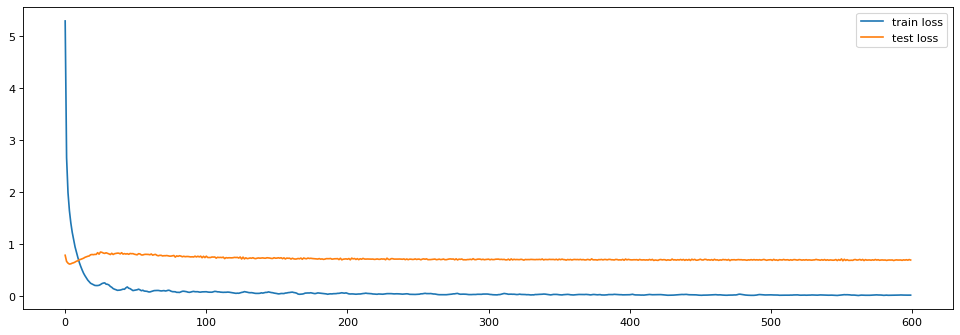

In [29]:
figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')



In [30]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [31]:
train_idx

array([False, False, False, ..., False, False, False])

In [32]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [33]:
len(Ptrain)

1918

In [34]:
Ptrain= np.concatenate(([np.nan, np.nan], Ptrain))

In [35]:
df.shape

(2559, 4)

In [36]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,])

In [37]:
P = np.concatenate(( Ptrain,[0,0], Ptest, a))

In [38]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [39]:
df.head(30)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction
Date,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN


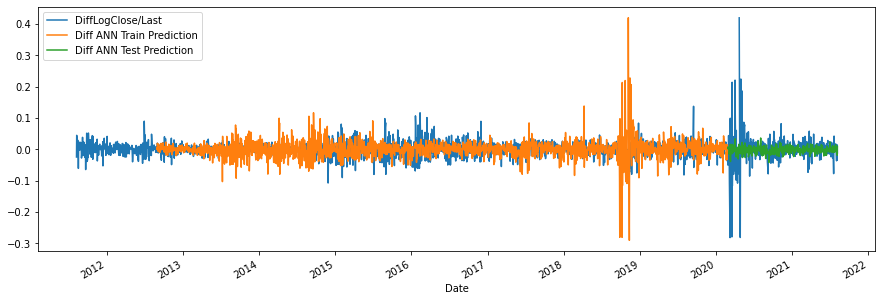

In [40]:
cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [41]:
# Needed to compute un-differenced predictions
df['ShiftLogClose/Last'] = df['LogClose/Last'].shift(1)
prev = df['ShiftLogClose/Last']
df

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last
Date,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086
...,...,...,...,...,...,...,...
2021-08-02,71.26,4.266335,-0.037054,-1.768478,NaN,-0.009759,4.303389
2021-08-03,70.56,4.256463,-0.009872,-0.462923,NaN,0.001480,4.266335
2021-08-04,68.15,4.221711,-0.034752,-1.657924,NaN,-0.001989,4.256463


In [42]:
# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']

In [43]:
# prev[train_idx] + Ptrain

In [44]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

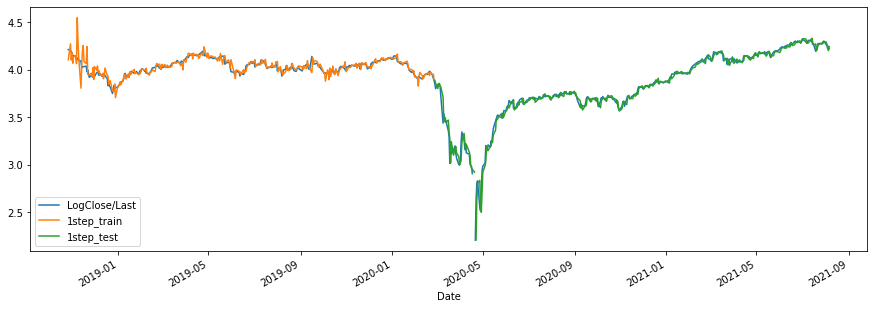

In [45]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [46]:
# prev[test_idx] + np.concatenate((Ptrain, [0,0,0,0,0,0,0,0,0,0,0,0]))

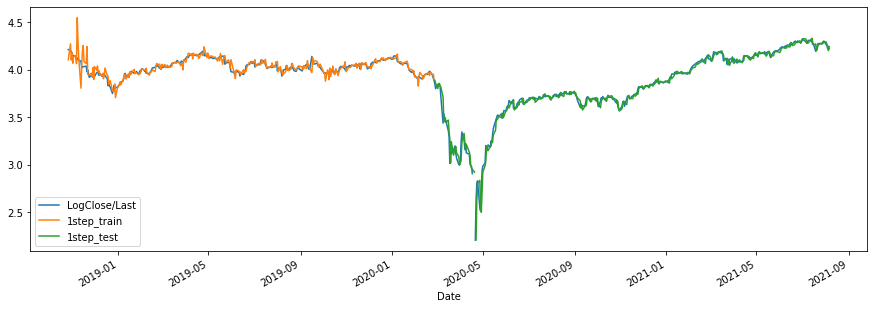

In [47]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [48]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [49]:
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [50]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

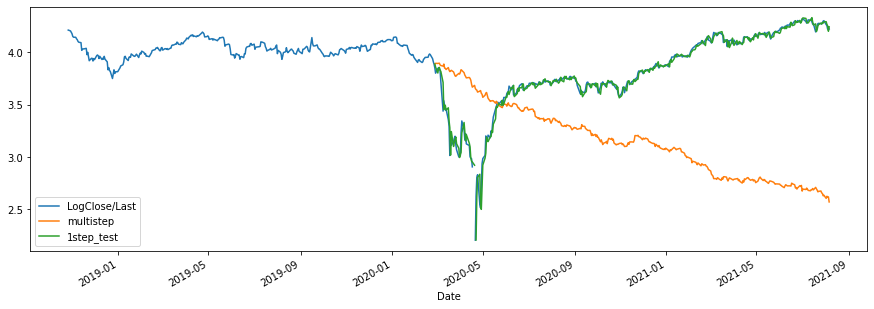

In [51]:
# plot 1-step and multi-step forecast
df.iloc[-700:][['LogClose/Last', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [52]:
# test_log_pass = df.iloc[-Ntest:]['LogClose/Last']
# mape1 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multistep'])
# print("multi-step MAPE:", mape1)
# mape2 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multioutput'])
# print("multi-output MAPE:", mape2)

In [53]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1919, 273) Y.shape (1919, 365)


In [54]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [55]:
 #Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [56]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [57]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=700,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/700
60/60 [==============================] - 7s 105ms/step - loss: 2.1124 - val_loss: 6.3502
Epoch 2/700
60/60 [==============================] - 0s 5ms/step - loss: 2.0218 - val_loss: 6.3308
Epoch 3/700
60/60 [==============================] - 6s 102ms/step - loss: 2.0793 - val_loss: 6.3198
Epoch 4/700
60/60 [==============================] - 0s 5ms/step - loss: 2.0447 - val_loss: 6.3079
Epoch 5/700
60/60 [==============================] - 0s 5ms/step - loss: 2.0824 - val_loss: 6.3028
Epoch 6/700
60/60 [==============================] - 7s 120ms/step - loss: 1.9997 - val_loss: 6.2963
Epoch 7/700
60/60 [==============================] - 0s 6ms/step - loss: 2.0061 - val_loss: 6.2995
Epoch 8/700
60/60 [==============================] - 0s 7ms/step - loss: 1.9725 - val_loss: 6.2991
Epoch 9/700
60/60 [==============================] - 6s 11ms/step - loss: 1.9484 - val_loss: 6.2960
Epoch 10/700
60/60 [==============================] - 0s 5ms/step - loss: 2.0155 - val_loss: 6.2970
Ep

60/60 [==============================] - 0s 5ms/step - loss: 1.8085 - val_loss: 6.3889
Epoch 83/700
60/60 [==============================] - 0s 6ms/step - loss: 1.8430 - val_loss: 6.3791
Epoch 84/700
60/60 [==============================] - 6s 102ms/step - loss: 1.8020 - val_loss: 6.3870
Epoch 85/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8432 - val_loss: 6.3813
Epoch 86/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8272 - val_loss: 6.3823
Epoch 87/700
60/60 [==============================] - 6s 106ms/step - loss: 1.8839 - val_loss: 6.3805
Epoch 88/700
60/60 [==============================] - 0s 6ms/step - loss: 1.8656 - val_loss: 6.3792
Epoch 89/700
60/60 [==============================] - 0s 6ms/step - loss: 1.8349 - val_loss: 6.3748
Epoch 90/700
60/60 [==============================] - 6s 108ms/step - loss: 1.8910 - val_loss: 6.3772
Epoch 91/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8831 - val_loss: 6.3746
Epoch 9

Epoch 163/700
60/60 [==============================] - 6s 107ms/step - loss: 1.7673 - val_loss: 6.4563
Epoch 164/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8261 - val_loss: 6.4648
Epoch 165/700
60/60 [==============================] - 6s 106ms/step - loss: 1.8197 - val_loss: 6.4605
Epoch 166/700
60/60 [==============================] - 0s 7ms/step - loss: 1.8869 - val_loss: 6.4786
Epoch 167/700
60/60 [==============================] - 7s 111ms/step - loss: 1.8257 - val_loss: 6.4730
Epoch 168/700
60/60 [==============================] - 0s 6ms/step - loss: 1.8373 - val_loss: 6.4806
Epoch 169/700
60/60 [==============================] - 7s 112ms/step - loss: 1.8042 - val_loss: 6.4868
Epoch 170/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7639 - val_loss: 6.4953
Epoch 171/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8359 - val_loss: 6.5048
Epoch 172/700
60/60 [==============================] - 7s 112ms/step - loss: 1.7497

60/60 [==============================] - 7s 115ms/step - loss: 1.7727 - val_loss: 6.7886
Epoch 244/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8319 - val_loss: 6.8091
Epoch 245/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7986 - val_loss: 6.8038
Epoch 246/700
60/60 [==============================] - 6s 103ms/step - loss: 1.7915 - val_loss: 6.8119
Epoch 247/700
60/60 [==============================] - 0s 6ms/step - loss: 1.7464 - val_loss: 6.8126
Epoch 248/700
60/60 [==============================] - 6s 109ms/step - loss: 1.8417 - val_loss: 6.8104
Epoch 249/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8384 - val_loss: 6.8384
Epoch 250/700
60/60 [==============================] - 6s 110ms/step - loss: 1.7966 - val_loss: 6.8562
Epoch 251/700
60/60 [==============================] - 0s 6ms/step - loss: 1.8185 - val_loss: 6.8408
Epoch 252/700
60/60 [==============================] - 6s 108ms/step - loss: 1.7665 - val_loss: 6

60/60 [==============================] - 6s 101ms/step - loss: 1.7908 - val_loss: 7.0690
Epoch 324/700
60/60 [==============================] - 0s 8ms/step - loss: 1.8086 - val_loss: 7.0758
Epoch 325/700
60/60 [==============================] - 0s 7ms/step - loss: 1.7179 - val_loss: 7.0457
Epoch 326/700
60/60 [==============================] - 6s 103ms/step - loss: 1.7875 - val_loss: 7.0431
Epoch 327/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7191 - val_loss: 7.0457
Epoch 328/700
60/60 [==============================] - 6s 99ms/step - loss: 1.7560 - val_loss: 7.0451
Epoch 329/700
60/60 [==============================] - 0s 6ms/step - loss: 1.7764 - val_loss: 7.0192
Epoch 330/700
60/60 [==============================] - 0s 7ms/step - loss: 1.7902 - val_loss: 7.0663
Epoch 331/700
60/60 [==============================] - 6s 102ms/step - loss: 1.7722 - val_loss: 7.0208
Epoch 332/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8014 - val_loss: 7.03

Epoch 404/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8134 - val_loss: 7.0282
Epoch 405/700
60/60 [==============================] - 3s 48ms/step - loss: 1.8100 - val_loss: 7.0065
Epoch 406/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7661 - val_loss: 7.0055
Epoch 407/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7820 - val_loss: 6.9923
Epoch 408/700
60/60 [==============================] - 3s 49ms/step - loss: 1.7872 - val_loss: 7.0637
Epoch 409/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8184 - val_loss: 6.9968
Epoch 410/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8206 - val_loss: 6.9995
Epoch 411/700
60/60 [==============================] - 3s 47ms/step - loss: 1.8005 - val_loss: 7.0120
Epoch 412/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7743 - val_loss: 7.0028
Epoch 413/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7570 - val_

Epoch 485/700
60/60 [==============================] - 3s 46ms/step - loss: 1.7670 - val_loss: 7.1251
Epoch 486/700
60/60 [==============================] - 0s 6ms/step - loss: 1.7743 - val_loss: 7.1339
Epoch 487/700
60/60 [==============================] - 3s 45ms/step - loss: 1.8300 - val_loss: 7.2127
Epoch 488/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7236 - val_loss: 7.1579
Epoch 489/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8257 - val_loss: 7.1529
Epoch 490/700
60/60 [==============================] - 3s 45ms/step - loss: 1.7828 - val_loss: 7.1670
Epoch 491/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8296 - val_loss: 7.1918
Epoch 492/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8045 - val_loss: 7.1588
Epoch 493/700
60/60 [==============================] - 3s 45ms/step - loss: 1.7711 - val_loss: 7.1766
Epoch 494/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8101 - val

Epoch 566/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8003 - val_loss: 7.1858
Epoch 567/700
60/60 [==============================] - 3s 48ms/step - loss: 1.8359 - val_loss: 7.1507
Epoch 568/700
60/60 [==============================] - 0s 6ms/step - loss: 1.7959 - val_loss: 7.1924
Epoch 569/700
60/60 [==============================] - 0s 6ms/step - loss: 1.7759 - val_loss: 7.2380
Epoch 570/700
60/60 [==============================] - 3s 46ms/step - loss: 1.7513 - val_loss: 7.2195
Epoch 571/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8086 - val_loss: 7.2057
Epoch 572/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7325 - val_loss: 7.2204
Epoch 573/700
60/60 [==============================] - 3s 48ms/step - loss: 1.7799 - val_loss: 7.2081
Epoch 574/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7581 - val_loss: 7.2352
Epoch 575/700
60/60 [==============================] - 3s 46ms/step - loss: 1.8472 - val

Epoch 647/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7837 - val_loss: 7.1782
Epoch 648/700
60/60 [==============================] - 3s 45ms/step - loss: 1.7771 - val_loss: 7.2284
Epoch 649/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7529 - val_loss: 7.2220
Epoch 650/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7805 - val_loss: 7.2060
Epoch 651/700
60/60 [==============================] - 3s 46ms/step - loss: 1.7952 - val_loss: 7.1881
Epoch 652/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7533 - val_loss: 7.1550
Epoch 653/700
60/60 [==============================] - 3s 46ms/step - loss: 1.7520 - val_loss: 7.1783
Epoch 654/700
60/60 [==============================] - 0s 5ms/step - loss: 1.7019 - val_loss: 7.1796
Epoch 655/700
60/60 [==============================] - 0s 5ms/step - loss: 1.8045 - val_loss: 7.1821
Epoch 656/700
60/60 [==============================] - 3s 45ms/step - loss: 1.7809 - val

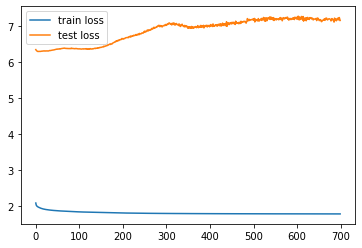

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [59]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [60]:
Ptrain.shape, Ptest.shape

((1918, 365), (365, 365))

In [61]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [62]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [63]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

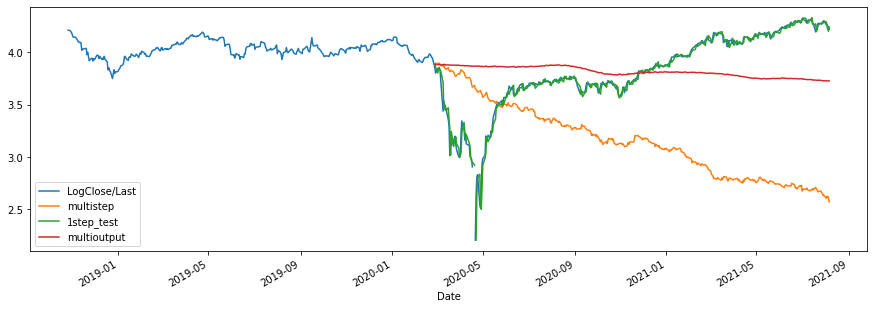

In [64]:
# plot all forecasts
cols = ['LogClose/Last', 'multistep', '1step_test', 'multioutput']
df.iloc[-700:][cols].plot(figsize=(15, 5));

In [65]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose/Last'].notna()

mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)
# mape0 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, '1step_test'])
# print("1step_test MAPE:", mape0)

multi-step MAPE: 45462146458926.32
multi-output MAPE: 47722146483048.49


In [66]:
df.head(10)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last,1step_train,1step_test,multistep,multioutput
Date,,,,,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269,NaN,NaN,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238,NaN,NaN,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514,NaN,NaN,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086,NaN,NaN,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN,4.447112,NaN,NaN,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN,4.475972,NaN,NaN,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN,4.461877,NaN,NaN,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN,4.472553,NaN,NaN,NaN,NaN


In [71]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mspe1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mspe2)

multi-step MSPE: 4.7905016
multi-output MSPE: 7.9461327


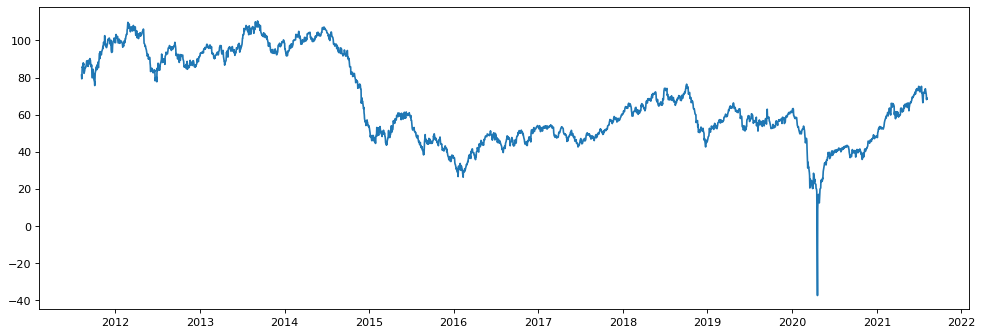

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(15,5), dpi=80)
plt.plot(df.iloc[:][['Close/Last']])
plt.savefig('raw_data_plot.png')

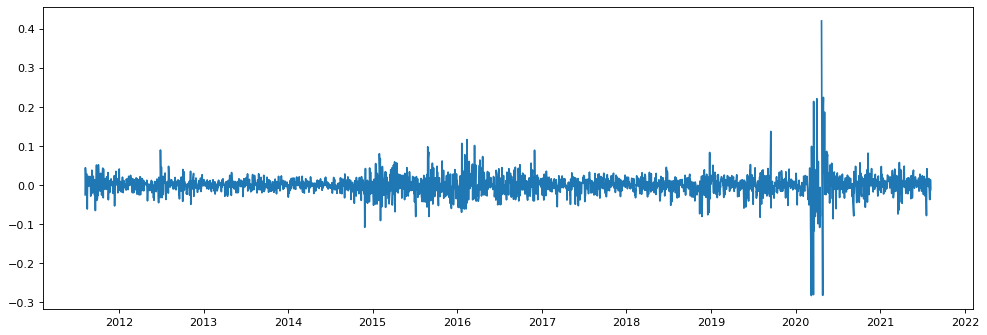

In [69]:
figure(figsize=(15,5), dpi=80)
# cols = ['DiffLogClose/Last 	']
# plt.plot(df[cols])

cols = ['DiffLogClose/Last',]
#         'Diff ANN Train Prediction',
#         'Diff ANN Test Prediction']
plt.plot(df[cols])

plt.savefig('LOGraw_data_error_plot.png')

In [70]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]


# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)



model.compile(
  loss='mse',
  optimizer='adam',
)


r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)


figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')

train_idx[:T+1] = False # first T+1 values are not predictable


Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()


# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']


# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest


# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));




X.shape (2546, 10) Y.shape (2546,)
Epoch 1/600
69/69 [==============================] - 4s 43ms/step - loss: 3.5810 - val_loss: 0.9053
Epoch 2/600
69/69 [==============================] - 0s 5ms/step - loss: 2.8481 - val_loss: 0.8216
Epoch 3/600
69/69 [==============================] - 3s 41ms/step - loss: 2.0766 - val_loss: 0.8037
Epoch 4/600
69/69 [==============================] - 0s 6ms/step - loss: 2.0694 - val_loss: 0.7932
Epoch 5/600
69/69 [==============================] - 3s 41ms/step - loss: 1.6608 - val_loss: 0.7870
Epoch 6/600
69/69 [==============================] - 0s 6ms/step - loss: 2.2369 - val_loss: 0.7852
Epoch 7/600
69/69 [==============================] - 3s 42ms/step - loss: 1.8309 - val_loss: 0.7845
Epoch 8/600
69/69 [==============================] - 0s 5ms/step - loss: 1.6944 - val_loss: 0.7858
Epoch 9/600
69/69 [==============================] - 3s 40ms/step - loss: 1.4876 - val_loss: 0.7848
Epoch 10/600
69/69 [==============================] - 1s 7ms/step - l

KeyboardInterrupt: 